In [ ]:
#| default_exp capture

# capture

> Screen Capture.

In [ ]:
#| export
from dialoghelper.core import *
from fastcore.all import *
from fasthtml.common import Div,Script
from httpx import post as xpost
from importlib import resources
from lisette.core import *

import base64,json,time,uuid

In [ ]:
from IPython.display import display, Image
import PIL.Image
from io import BytesIO

In [ ]:
print((resources.files('dialoghelper')/'screenshot.js').read_text())

window.getScreenshot = async (maxWidth = 1280, maxHeight = 1024) => {
    if (window?.vtrack) {
        const cap = new ImageCapture(window.vtrack);
        const img = await cap.grabFrame();
        // rescale and convert to b64
        const scaleX = maxWidth / img.width;
        const scaleY = maxHeight / img.height;
        const scale = Math.min(scaleX, scaleY, 1); // don't upscale
        const newWidth = Math.floor(img.width * scale);
        const newHeight = Math.floor(img.height * scale);
        const c = document.createElement('canvas');
        c.width = newWidth; c.height = newHeight;
        c.getContext('2d').drawImage(img, 0, 0, newWidth, newHeight);
        return c.toDataURL();
    }
}

document.body.addEventListener('shareScreen', async (e) => {
    vstream = await navigator.mediaDevices.getDisplayMedia();
    window.vtrack = vstream.getVideoTracks()[0];
});

document.body.addEventListener('captureScreen', async (e) => {
    pushData(e.detail.idx, {img_data: await g

In [ ]:
#| export
def setup_share():
    "Setup screen sharing"
    iife((resources.files('dialoghelper')/'screenshot.js').read_text())
    add_scr(Div(id='share-screen', style='display:none;'))
    add_scr(Div(id='capture-screen', style='display:none;'))

In [ ]:
setup_share()

In [ ]:
#| export
def start_share(): fire_event('shareScreen', id='share-screen')

In [ ]:
start_share()

In [ ]:
#| export
def capture_screen(timeout=15):
    "Capture the screen. Re-call this function to get the most recent screenshot, as needed. Use default timeout where possible"
    idx = uuid.uuid4()
    fire_event('captureScreen', 'share-screen', data={'idx': str(idx)})
    d = pop_data(idx, timeout)
    if 'img_data' in d: return d.img_data
    else: raise Exception(f'Capture failed: {d.error}')

In [ ]:
res = capture_screen()
res[:50]

'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABQAA'

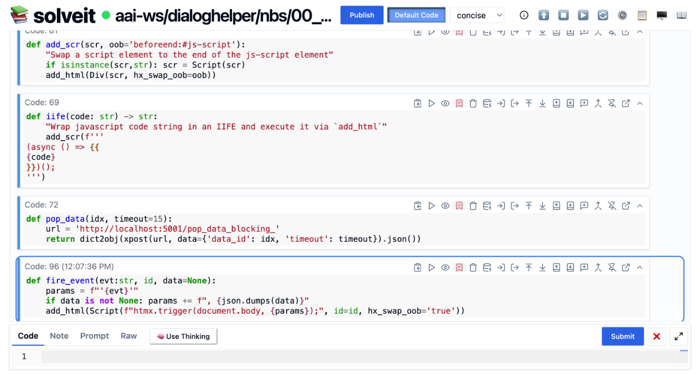

In [ ]:
data = base64.b64decode(res.split(',')[1])
img = PIL.Image.open(BytesIO(data))
img.thumbnail((700,700))
img

In [ ]:
#| export
def capture_tool(timeout:int=15):
    "Capture the screen. Re-call this function to get the most recent screenshot, as needed. Use default timeout where possible"
    try: d = capture_screen(timeout)
    except Exception as e: return f'Capture failed: {e}'
    return ToolResponse([{'type': 'image_url', 'image_url': d}])

Please view my screen with &`capture_tool` and describe briefly what you see.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->



<details class='tool-usage-details'>

```json
{
  "id": "toolu_014yW6bKUeWsmxWfgxYcfAV5",
  "call": {
    "function": "capture_tool",
    "arguments": {
      "timeout": "15"
    }
  },
  "result": "[{'type': 'image_url', 'image_url': 'data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABQAAAAKsCAYAAACzn<TRUNCATED>"
}
```

</details>

I can see you're working in a solveit notebook on the `dialoghelper` library. The screen shows several code cells with Python functions including `iife`, `pop_data`, and `fire_event`. There's a "View/edit dialog" section open at the bottom with tabs for Code, Note, Prompt, and Raw, along with a "Use Thinking" checkbox and Submit button.

## export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()